[ 3. -1.  2. -4.]
Root mean squared error:  3.3326908261591164e-24


,Open,High,Price,Low
0,28400,28482,28060,28025
1,28136,28382,28184,28135
2,28145,28255,28119,28097
3,28125,28192,27981,27947
4,28060,28146,28007,27981
5,27995,28100,28022,27945
6,28088,28195,28019,27985
7,28049,28157,28008,27996
8,28025,28159,28109,28025
9,28170,28638,28614,28170


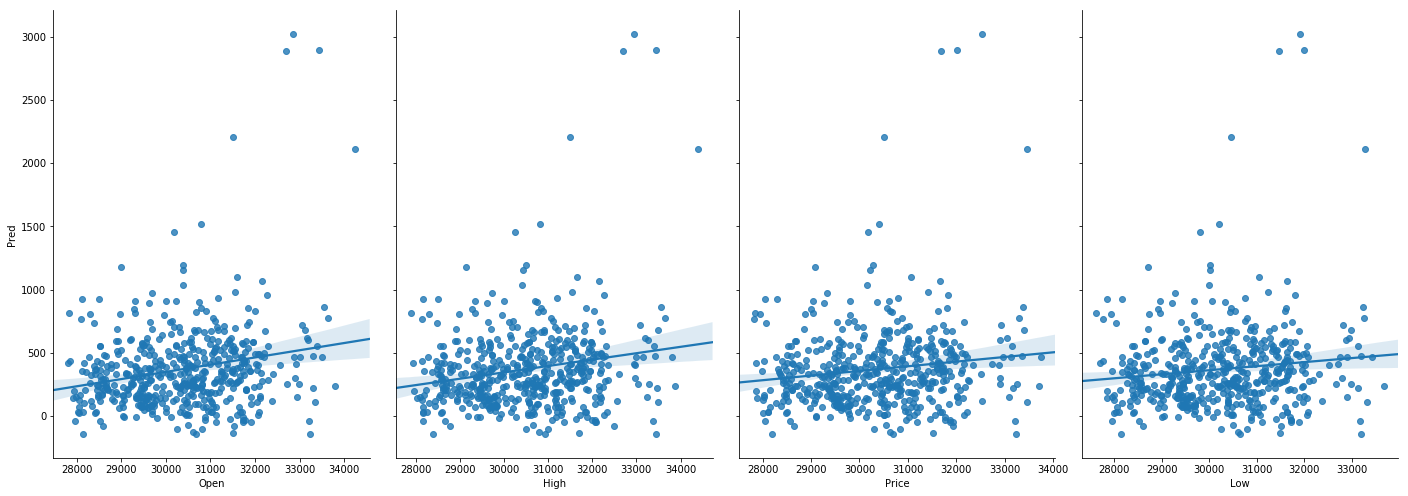

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
df = pd.read_csv('GOLD.csv')
filtered_df = df[df['Pred'].isnull()]
df1 = df[df["Pred"].notnull()]
X = df1[["Open","High","Price","Low"]]
y = df1["Pred"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr = linear_model.LinearRegression()
model = regr.fit(X_train, y_train)
pred = regr.predict(X)
b = regr.coef_.round(2)
m = regr.intercept_
print(b)
df["Pred"] = m + b[0]*df["Open"] + b[1]*df["High"] + b[2]*df["Price"] + b[3]*df["Low"]
sns.pairplot(df, x_vars=["Open","High","Price","Low"], y_vars='Pred', size=7, aspect=0.7, kind='reg')
y_pred = regr.predict(X_test)
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
rmse = mean_squared_error(y, pred)
print('Root mean squared error: ', rmse)
# model fits accurately


Root mean squared error:  0.4814157941941633


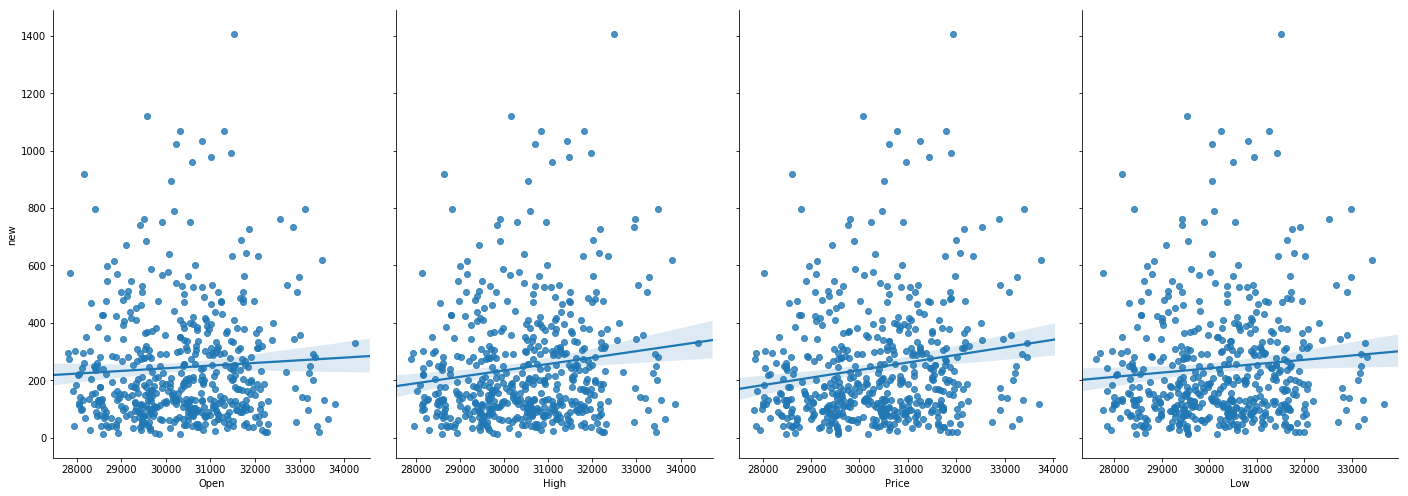

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
df =  pd.read_csv("GOLD.csv")
X = df[["Price","High","Low","Open"]]
y = df["new"]
sns.pairplot(df,x_vars = ["Open","High","Price","Low"], y_vars = 'new',size = 7 , aspect= 0.7 , kind ="reg")
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
regr2 = linear_model.LinearRegression()
model = regr2.fit(X_train, y_train)
y_predicted = regr2.predict(X)
b = regr2.coef_.round(2)
m = regr2.intercept_
rmse = mean_squared_error(y, y_predicted)
print('Root mean squared error: ', rmse)

In [32]:
### for the new column, as we plotted the graph the points were far away from each other and hence a linear regression couldn't fit it so therefore new column is a polynomial function

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


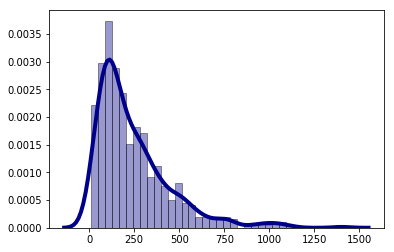

In [85]:
sns.distplot(y_predicted, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [93]:
y_pred = regr2.predict(X_test)
df_new = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

# model has some error associated

In [105]:
### Question 2

In [39]:
import pandas as pd
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
df1 = pd.read_csv('Nifty50.csv',parse_dates=True,index_col = 'Date')
df2 = pd.read_csv('PVR.csv',parse_dates = True,index_col='Date')
df = pd.concat([df1["Close"],df2["Close Price"]],axis=1) 
df.columns = ["Nifty50","PVR"]
new = df.tail(90)
X = new["Nifty50"]
y = new["PVR"]
X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    PVR   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     107.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           5.86e-17
Time:                        17:56:33   Log-Likelihood:                -493.27
No. Observations:                  90   AIC:                             990.5
Df Residuals:                      88   BIC:                             995.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -285.3277    183.153     -1.558      0.1

1615.558888888889

In [101]:
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
df1 = pd.read_csv('Nifty50.csv')
df2 = pd.read_csv('PVR.csv')
df = pd.concat([df1["Close"],df2["Close Price"]],axis=1) 
df.columns = ["Nifty50","PVR"]
new = df.tail(90).dropna()
X = pd.DataFrame(new["Nifty50"])
y = pd.DataFrame(new["PVR"])
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
regr2 = linear_model.LinearRegression()
model = regr2.fit(X_train, y_train)
b = regr2.coef_.round(3)
b

array([[0.17]])

In [114]:
import pandas as pd
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
df1 = pd.read_csv('Nifty50.csv',parse_dates=True,index_col = 'Date')
df2 = pd.read_csv('PVR.csv',parse_dates = True,index_col='Date')
df = pd.concat([df1["Close"],df2["Close Price"]],axis=1) 
df.columns = ["Nifty50","PVR"]
X = pd.DataFrame(df["Nifty50"]).Nifty50.resample('M').mean()
y = pd.DataFrame(df["PVR"]).PVR.resample('M').mean()
X = pd.DataFrame(new["Nifty50"])
y = pd.DataFrame(new["PVR"])
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
regr2 = linear_model.LinearRegression()
model = regr2.fit(X_train, y_train)
b = regr2.coef_.round(3)
b

array([[0.164]])

In [ ]:
### Beta value is the measure of volality so linear regression model give us the coefficient for the linear relation between 
### the market value and the given stock where the slope gives us beta value
### We got beta value less than 1 implies the stock is less volatile market value
### negative beta value indicates the stock value acts reverse to the market value